# Изучение закономерностей, определяющих успешность игр

### Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

##### Описание столбцов

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Цель исследования:** 
Выявить определяющие успешность игры закономерности.

**Ход исследования:**
Данные о продажах игр я получу из файла '/datasets/games.csv'.
Моё исследование пройдёт в 6 этапов:
1. Обзор данных.

2. Предобработка данных(заменю названия столбцов, обработаю пропуски, преобразую данные в нужные типы, обработаю явные и неявные дубликаты).

3. Посчитаю суммарные продажи игр во всех регионах и запишу их в отдельный столбец.

4. Проведу исследовательский анализ данных.

5. Составлю портрет пользователя каждого региона.

6. Проверю гипотезы о равенстве средних пользовательских рейтингов платформ Xbox One и PC и о различии средних пользовательских рейтингов жанров Action и Sports.

7. Общий вывод.

### Обзор данных.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

C:\Users\79156\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('games.csv')
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [5]:
data.duplicated().sum()

0

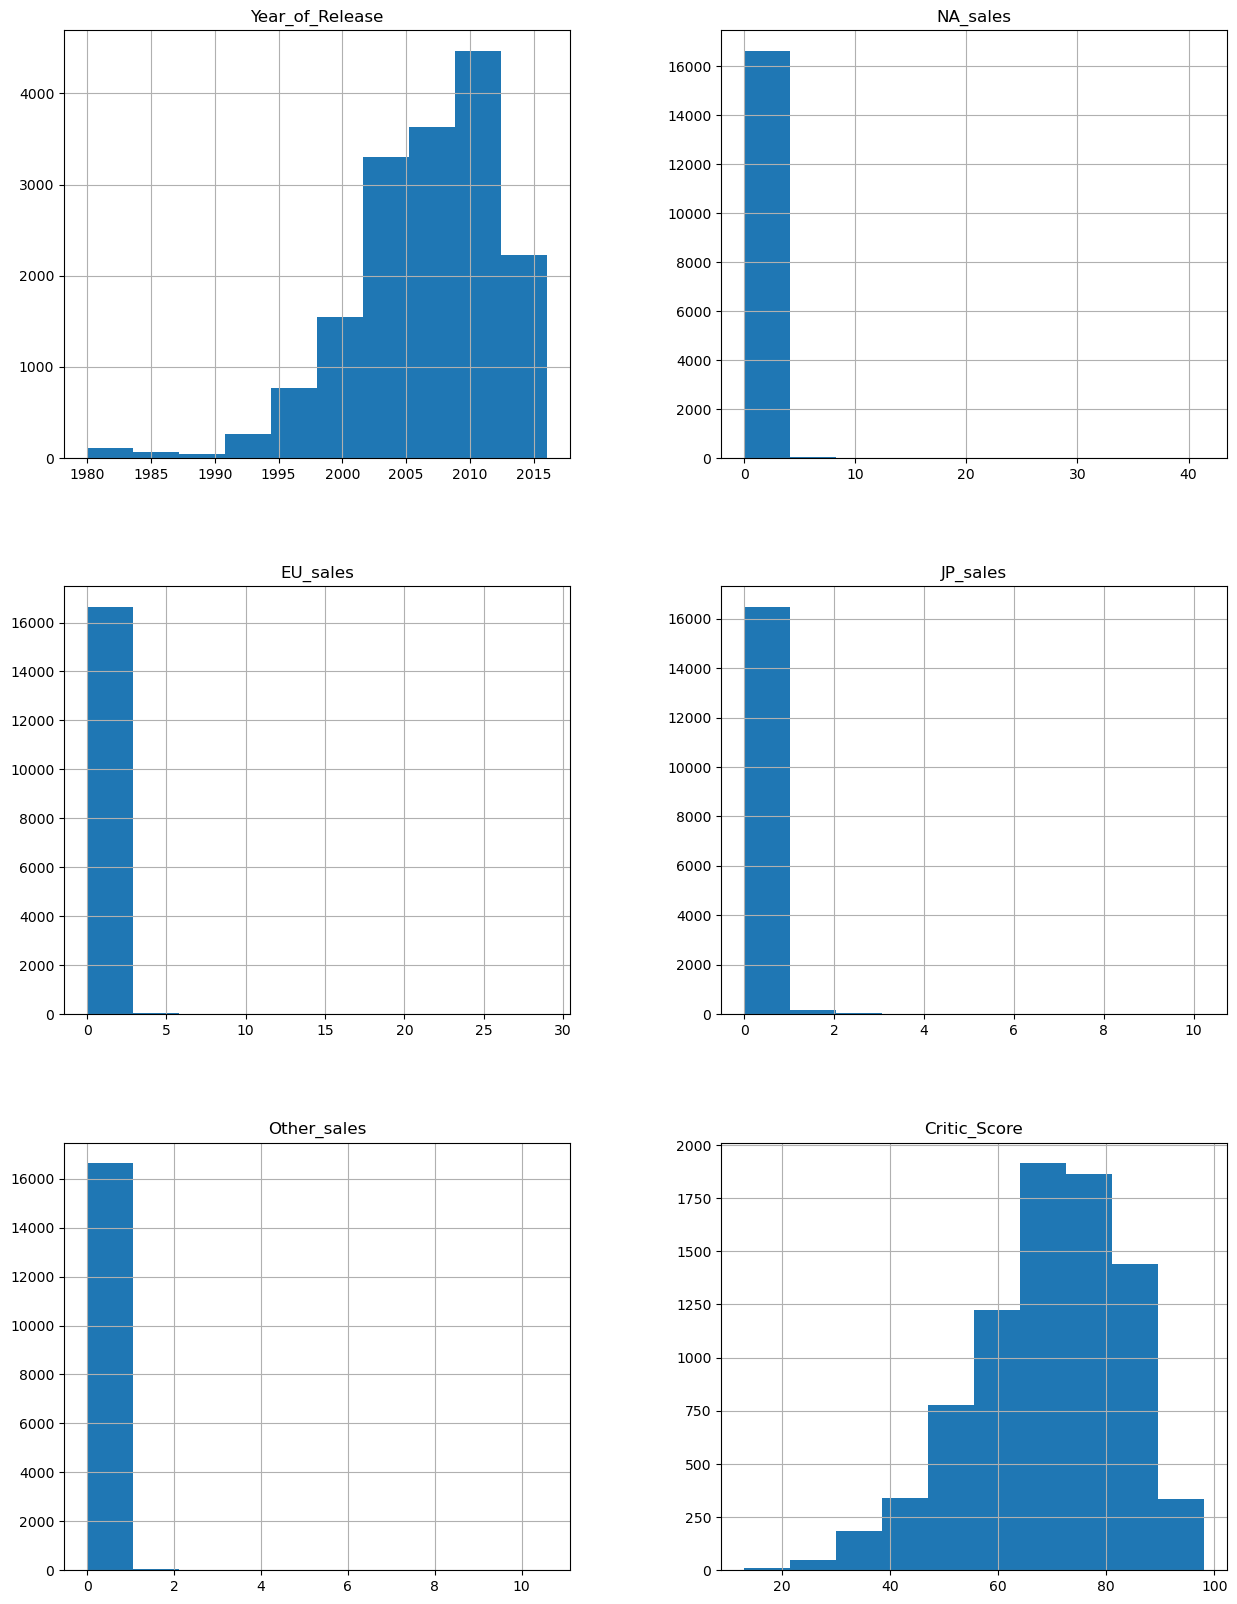

In [6]:
data.hist(figsize=(15, 20));

Ознакомился с данными. В датасете 11 столбцов и 16715 строк. 

Есть столбцы с пропусками. В столбце Name 2 пропучка, в Year_of_Release 269 пропускрв, в Critic_Score 8578 пропусков, в User_Score 6701 пропусков, в Rating 6766 пропусков. 

Явных дубликатов в данных нет.

По гистограмме столбца Year_of_Release сразу можно увидеть, что активный рост количества выпуска игр начался примерно в 1992 год и был примерно до 2011 года, но к 2016 рост сократился.

### Предобработка данных.

Приведём название колонок к нижнему регистру.

In [7]:
data.columns = data.columns.str.lower()

In [8]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [9]:
data[data['name'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Удалим строки с пропусками в столбце name, так как их только 2, не повлияет на анализ.

In [10]:
data = data.dropna(subset = ['name'])

In [11]:
data[data['year_of_release'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


Удалим строки с пропусками в столбце year_of_release, так как их только 269, не повлияет на анализ.

In [12]:
data = data.dropna(subset = ['year_of_release'])

In [13]:
data[data['genre'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Удалим строки с пропусками в столбце genre, так как их только 2, не повлияет на анализ.

In [14]:
data = data.dropna(subset = ['genre'])

In [15]:
data[data['critic_score'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


В столбце critic_score пропусков 8578, не будем удалять и заменять их, так как результат анализа может исказиться.

In [16]:
data[data['user_score'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [17]:
data[data['user_score'] == 'tbd'].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E


In [18]:
data['user_score'].value_counts()['tbd']

2376

В столбце user_score пропусков 6701 и значений tbd - 2376.tbd означает, что оценка не проставлена. Заменим тип данных с object на float64 с помощью метода to_numeric() и параметра errors='coerce'. Тогда некорректные значения(tbd) принудительно заменятся на NaN.

In [19]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [20]:
data[data['rating'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [21]:
data['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

В столбце rating 6766 пропусков. Заменим их на no_info. Также категоризируем данные. Значений: EC, K-A, AO, RP очень мало. Присвоим им другие категории, которые похожи смыслом.


«EC» («Early childhood») — «Для детей младшего возраста

E» («Everyone») — «Для всех(K-A)

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше

T» («Teen») — «Подросткам

M» («Mature») — «Для взрослых

AO» («Adults Only 18+») — «Только для взрослых

RP» («Rating Pending») — «Рейтинг ожидается

RP 17+» («Rating Pending») — «Рейтинг ожидается - примерно 17+

In [22]:
data['rating'] = data['rating'].fillna('no_info')

In [23]:
data.loc[data['rating'] == 'EC', 'rating'] = 'E'
data.loc[data['rating'] == 'K-A', 'rating'] = 'E'
data.loc[data['rating'] == 'RP', 'rating'] = 'no_info'
data.loc[data['rating'] == 'AO', 'rating'] = 'M'

Изменим тип данных из float в int в столбцах: year_of_release и critic_score.

In [24]:
data['year_of_release'] = data['year_of_release'].astype('int64', errors='ignore')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [26]:
data.duplicated().sum()

0

Дубликатов нет.

In [27]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [28]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_info,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_info,31.38


Посчитал суммарные продажи во всех регионах в стодбце total sales.

**Вывод: Привели название колонок к нижнему регистру. Обработали пропуски, некоторые строки с пропусками удалили, некоторые оставили с пропусками, другие заменили новыми значениями. Категоризовали данные в столбце rating. Привели данные к нужному типу. Дубликатов в данных не было.** 

 ### исследовательский анализ данных.

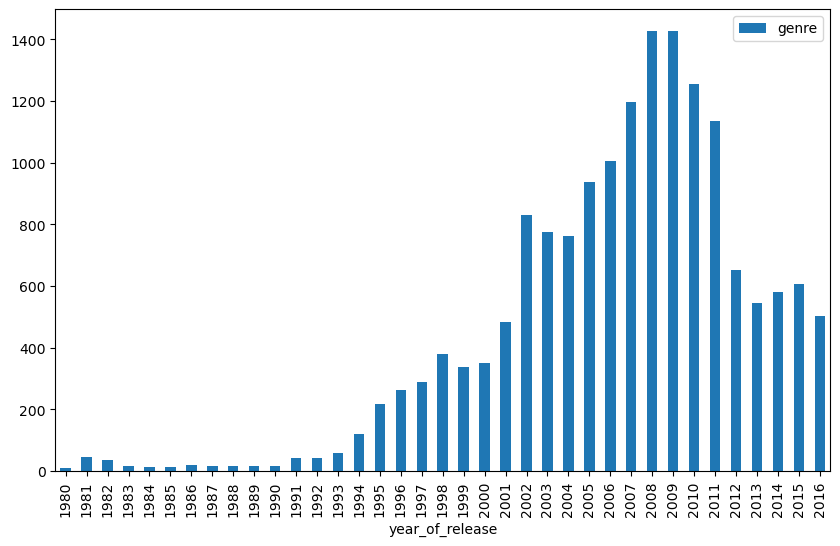

In [29]:
pivot_table = data.pivot_table(index='year_of_release', values='genre', aggfunc='count').plot(kind='bar', figsize=(10, 6))

Больше всего игр было выпущено в 2008 и 2009 годах. C 1991 года пошёл рост выпуска игр, в 1999 небольшой спад, с 2001 резкий рост вплоть до 2009 года. Далее пошёл спад опять. И к 2016 году количество выпуска игр сократилось примерно в 2.5 раза в сравнении с пиковым значением 2008 и 2009 годов.

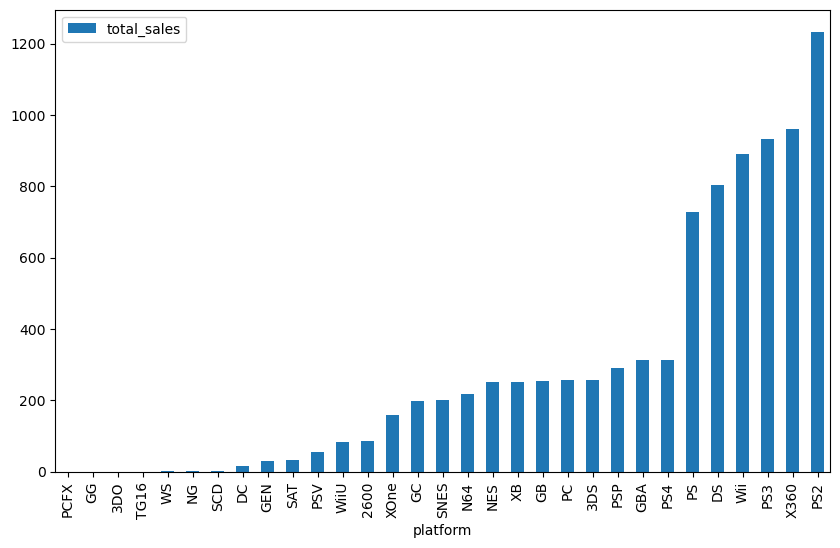

In [30]:
pivot_table = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales').plot(kind='bar', figsize=(10, 6))

Платформы с наибольшими суммарными продажами:PS2, X360, PS3, Wii, DS.

In [31]:
df_ps2 = data.loc[data['platform'] == 'PS2']

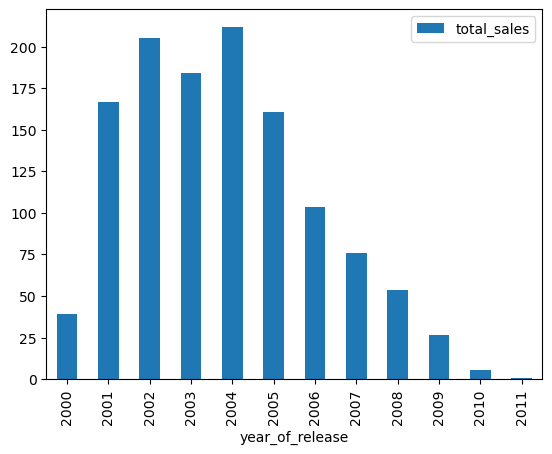

In [32]:
pivot_table_ps2 = df_ps2.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')

In [33]:
df_x360 = data.loc[data['platform'] == 'X360']

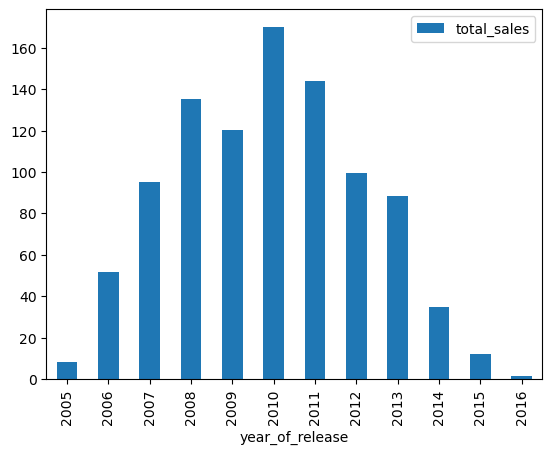

In [34]:
pivot_table_x360 = df_x360.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')

In [35]:
df_ps3 = data.loc[data['platform'] == 'PS3']

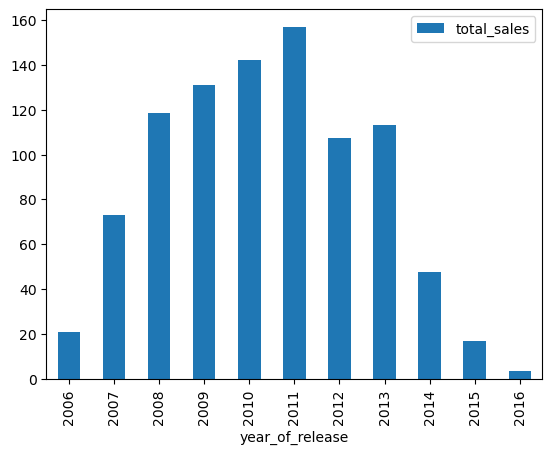

In [36]:
pivot_table_ps3 = df_ps3.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')

In [37]:
df_wii = data.loc[data['platform'] == 'Wii']

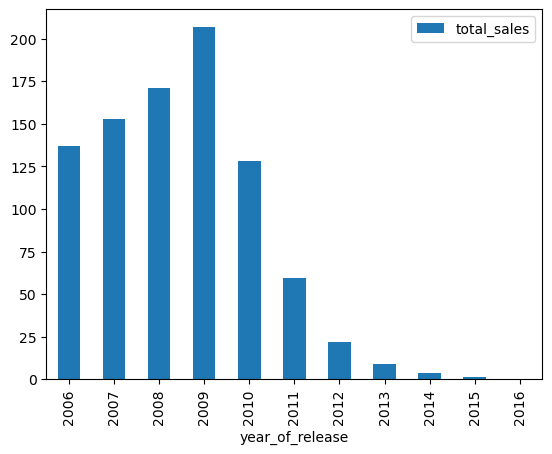

In [38]:
pivot_table_wii = df_wii.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')

In [39]:
df_ds = data.loc[data['platform'] == 'DS']

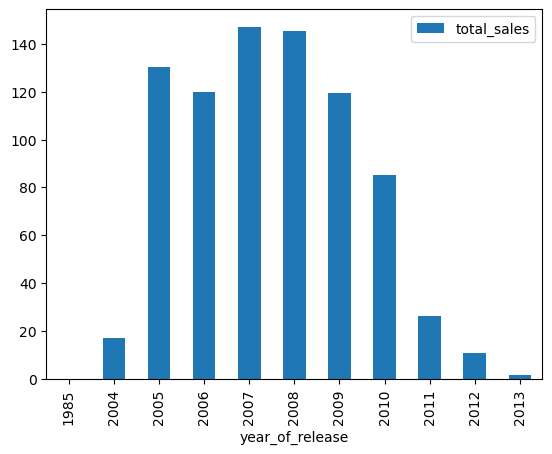

In [40]:
pivot_table_ds = df_ds.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')

PS2 появилась в 2000 году, самые большие продажи были с 2002 по 2004 год, дальше спад, и к 2011 году количество продаж упало до своего минимума.

X360 появилась в 2005 году, пиковые продажи были в 2010 году, потом спад, и в 2016 году самые маленькие продажи.

PS3 появилась в 2006 году, активный рост продаж был до своего пика в 2011 году, потом спад, и в 2016 году самые маленькие продажи.

Wii появилась в 2006 году, активный рост продаж был до своего пика в 2009 году, потом спад, и в 2016 году самые маленькие продажи.

DS появилась в 1985 году, продажи пошли только в 2004 году, резкий скачок произошёл в 2005 году. Продажи шли хорошо до 2008, потом пошёл спад, и в 2016 году самые маленькие продажи.

В среднем за 10 лет с момента своего появления платформа теряет свою актуальность.

In [41]:
last_platform = data.query('year_of_release >= 2013')

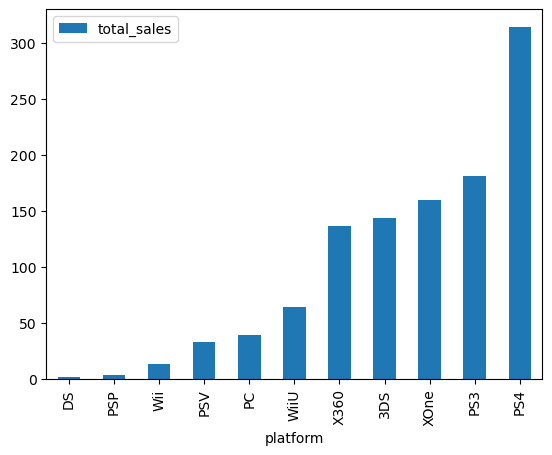

In [42]:
top_sales_platform = last_platform.pivot_table(index='platform', values='total_sales', aggfunc='sum').\
sort_values('total_sales').plot(kind='bar')

За последние 4 года, с 2013 по 2016 по продажам лидируют: PS4, PS3, XOne.

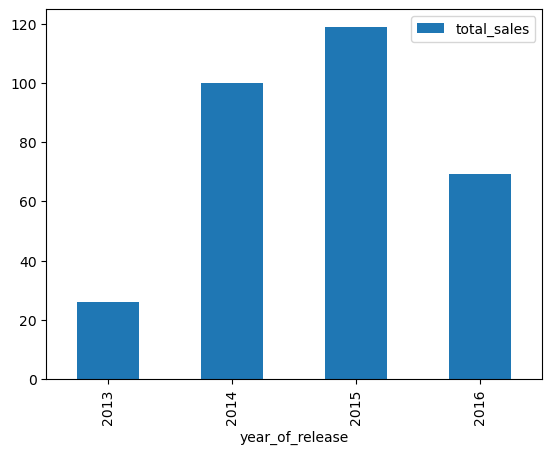

In [43]:
last_platform.query('platform == "PS4"').\
pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar');

В 2014 резкий рост продаж PS4, в 2016 спад.

<AxesSubplot:xlabel='year_of_release'>

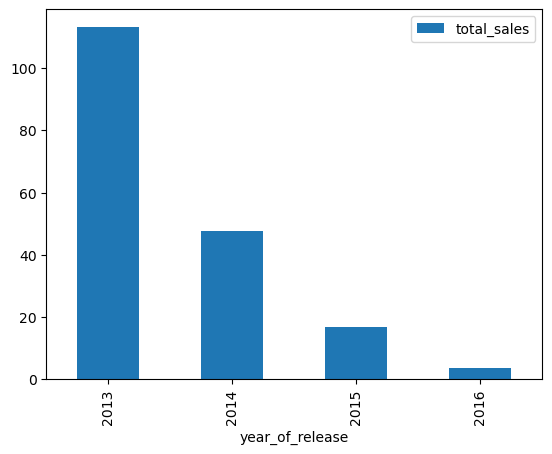

In [44]:
last_platform.query('platform == "PS3"').\
pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')

С 2013 по 2016 идёт спад продаж PS3.

<AxesSubplot:xlabel='year_of_release'>

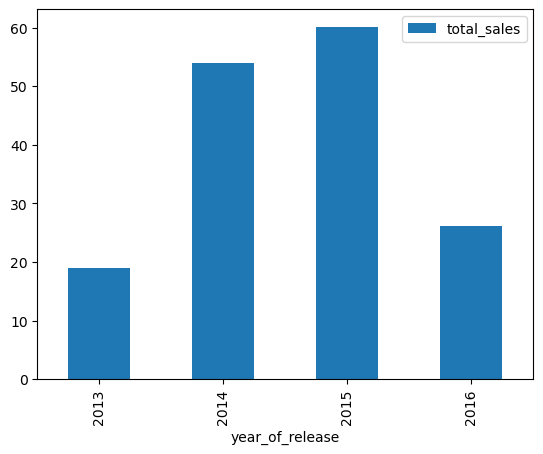

In [45]:
last_platform.query('platform == "XOne"').\
pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')

С 2013 по 2015 идёт рост продаж XOne, в 2016 спад продаж примерно в 2 раза.

За последние 4 года, с 2013 по 2016 по продажам лидируют: PS4, PS3, XOne. Эти платформы и будут потенциально прибыльными.

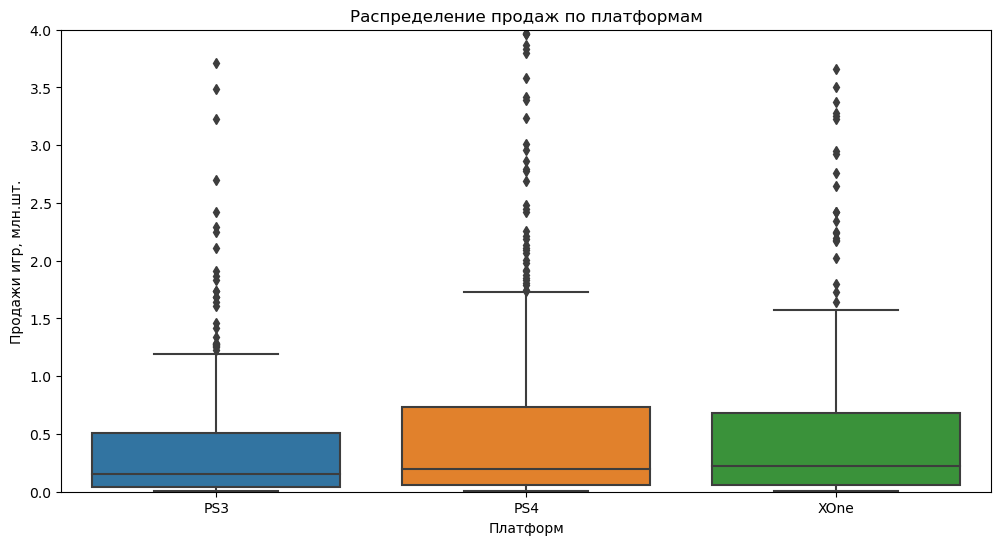

In [46]:
top_3_platform = last_platform.query('platform == ["PS4", "PS3", "XOne"]')
plt.figure(figsize=(12,6))
ax = sns.boxplot(data = top_3_platform , y ='total_sales', x ='platform')
plt.ylim(0,4)
ax.set_ylabel('Продажи игр, млн.шт.')
ax.set_xlabel('Платформ')
ax.set_title('Распределение продаж по платформам')
plt.show()

In [47]:
last_platform.pivot_table(index = 'platform', values = 'total_sales',aggfunc = ['median', 'mean'])

,median,mean
,total_sales,total_sales
platform,,
3DS,0.090,0.472772
DS,0.150,0.192500
PC,0.080,0.208624
PS3,0.150,0.525884
PS4,0.200,0.801378
PSP,0.020,0.052239
PSV,0.040,0.092151
Wii,0.180,0.593913


Видим, что выбросы есть во всех топовых платформах(PS3, XOne, PS4). Это значит, что есть игры, которые очень популярные, и их продаж было аномально много в сравнении с другими играми.

В top_3_platform будут храниться данные только по топовым платформам: PS3, XOne, PS4

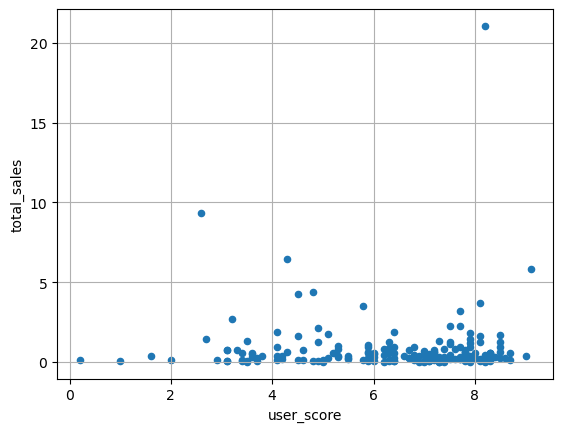

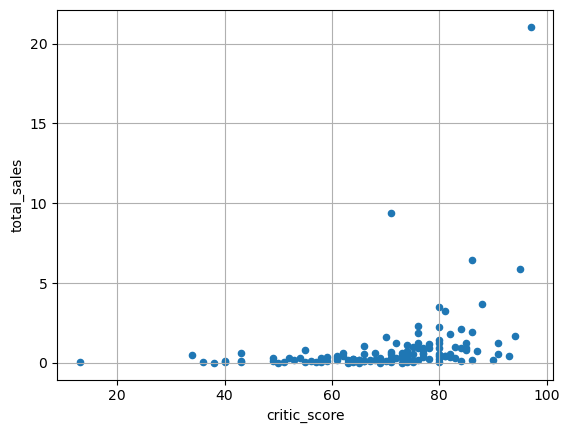

In [48]:
top_3_ps3 = top_3_platform.query('platform == "PS3"')
top_3_ps3.plot(x='user_score', y='total_sales', kind='scatter', grid=True);
top_3_ps3.plot(x='critic_score', y='total_sales', kind='scatter', grid=True);

In [49]:
print(top_3_ps3['user_score'].corr(top_3_ps3['total_sales']), 'корреляция между отзывами пользователей и продажами')
print(top_3_ps3['critic_score'].corr(top_3_ps3['total_sales']), 'корреляция между отзывами критиков и продажами')

0.0023944027357566907 корреляция между отзывами пользователей и продажами
0.3342853393371919 корреляция между отзывами критиков и продажами


Корреляция между отзывами пользователей и продажами PS3 практически 0. Зависимости между отзывами пользователей и продажами нет.

Корреляция между отзывами критиков и продажами PS3 маленькая. Отзывы критиков в какой-то степени влияют на продажи, но слабо.

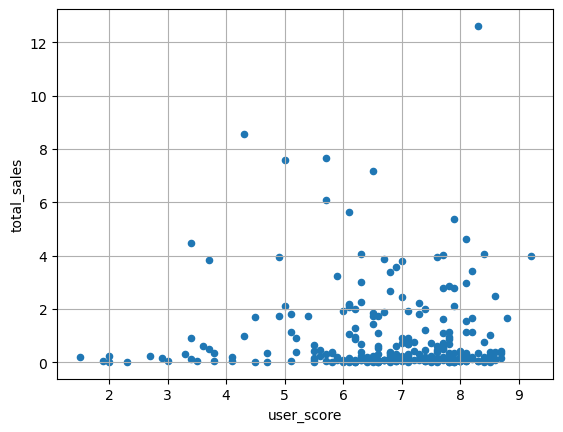

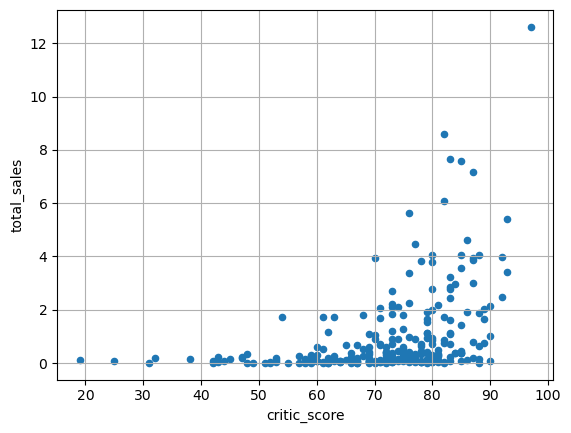

In [50]:
top_3_ps4 = top_3_platform.query('platform == "PS4"')
top_3_ps4.plot(x='user_score', y='total_sales', kind='scatter', grid=True);
top_3_ps4.plot(x='critic_score', y='total_sales', kind='scatter', grid=True);

In [51]:
print(top_3_ps4['user_score'].corr(top_3_ps4['total_sales']), 'корреляция между отзывами пользователей и продажами')
print(top_3_ps4['critic_score'].corr(top_3_ps4['total_sales']), 'корреляция между отзывами критиков и продажами')

-0.03195711020455643 корреляция между отзывами пользователей и продажами
0.4065679020617816 корреляция между отзывами критиков и продажами


Корреляция между отзывами пользователей и продажами PS4 практически 0. Зависимости между отзывами пользователей и продажами нет.

Корреляция между отзывами критиков и продажами PS4 слабая. Отзывы критиков частично влияют на продажи.

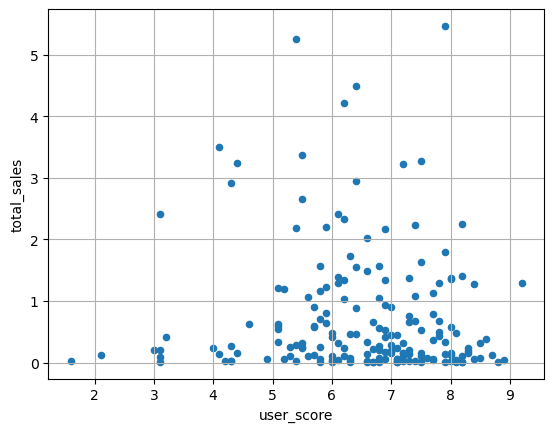

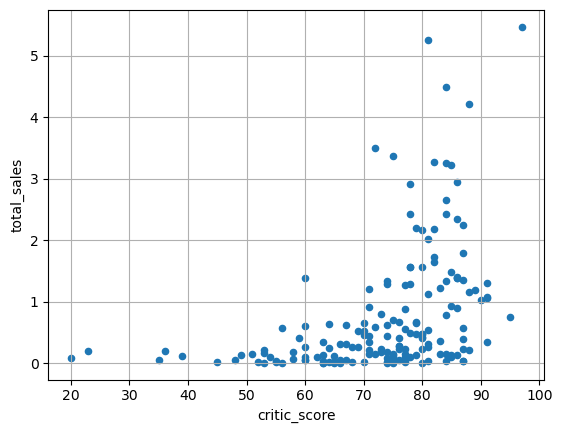

In [52]:
top_3_xone = top_3_platform.query('platform == "XOne"')
top_3_xone.plot(x='user_score', y='total_sales', kind='scatter', grid=True);
top_3_xone.plot(x='critic_score', y='total_sales', kind='scatter', grid=True);

In [53]:
print(top_3_xone['user_score'].corr(top_3_xone['total_sales']), 'корреляция между отзывами пользователей и продажами')
print(top_3_xone['critic_score'].corr(top_3_xone['total_sales']), 'корреляция между отзывами критиков и продажами')

-0.06892505328279416 корреляция между отзывами пользователей и продажами
0.4169983280084017 корреляция между отзывами критиков и продажами


Корреляция между отзывами пользователей и продажами XOne практически 0. Зависимости между отзывами пользователей и продажами нет.

Корреляция между отзывами критиков и продажами XOne маленькая. Отзывы критиков в какой-то степени влияют на продажи, но слабо.

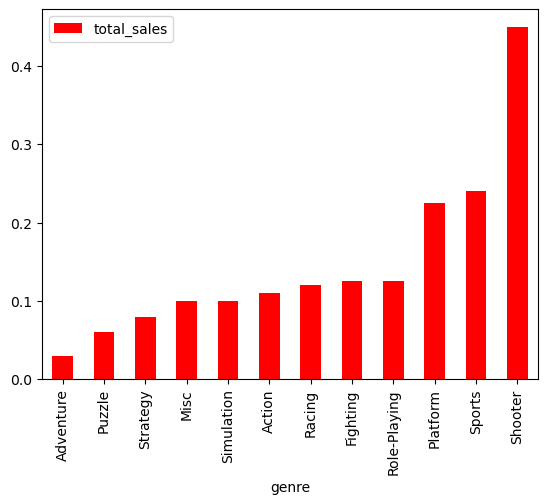

In [54]:
pivot_table_genre = last_platform.pivot_table(index='genre', values='total_sales', aggfunc='median').\
sort_values('total_sales').plot(kind='bar', color = 'red')

Рассмотрели медианные продажи по жанрам игр. Разные жанры игр приносят разную прибыль. Самые прибыльные жанры: shooter, sports, Platform. Самые неприбыльные: adventury, puzzle, strategy.

**Вывод: C 1991 года пошёл рост выпуска игр. Больше всего игр было выпущено в 2008 и 2009 годах, но к 2016 году количество выпуска игр сократилось примерно в 2.5 раза в сравнении с пиковым значением.**

**В среднем за 10 лет с момента своего появления платформа теряет свою актуальность.**

**За последние 4 года, с 2013 по 2016 по продажам лидируют: PS4, PS3, XOne.**

**Отзывы пользователей никак не влияют на продажи игр, отзывы критиков также большого  значения не имеют.**

**Самые прибыльные жанры: shooter, sports, Platform. Самые неприбыльные: adventury, puzzle, strategy.**

### Портрет пользователя каждого региона.

In [55]:
platform_na = last_platform.groupby('platform')['na_sales'].agg(['sum'])
platform_na

,sum
platform,
3DS,38.20
DS,0.57
PC,11.11
PS3,63.50
PS4,108.74
PSP,0.00
PSV,5.04
Wii,6.56
WiiU,29.21


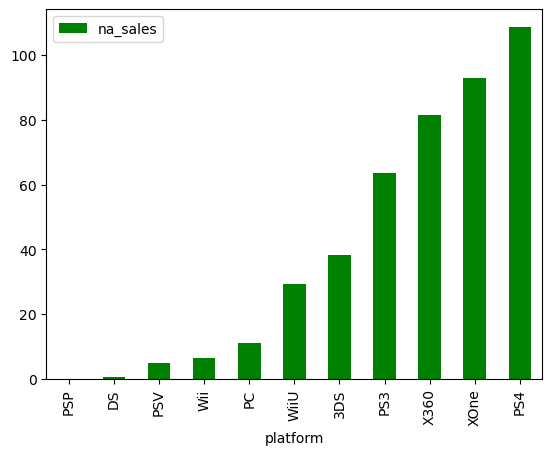

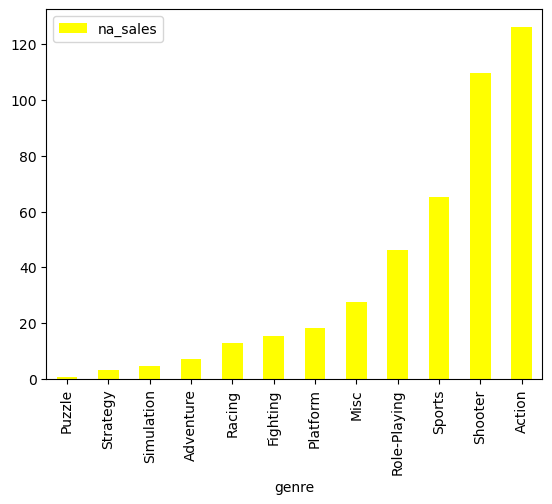

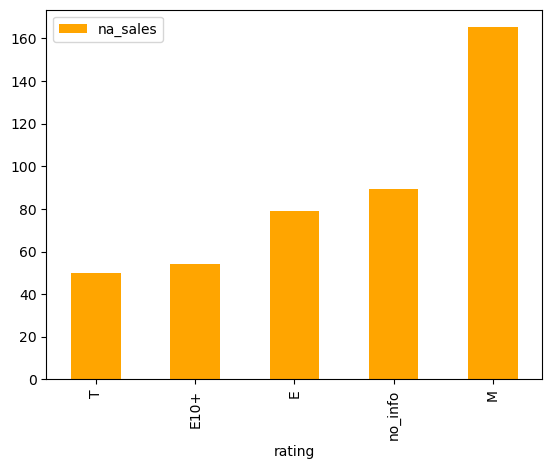

In [56]:
platform_na = last_platform.pivot_table(index='platform', values='na_sales', aggfunc='sum').\
sort_values('na_sales').plot(kind='bar', color='green')

platform_na = last_platform.pivot_table(index='genre', values='na_sales', aggfunc='sum').\
sort_values('na_sales').plot(kind='bar', color='yellow')

platform_na = last_platform.pivot_table(index='rating', values='na_sales', aggfunc='sum').\
sort_values('na_sales').plot(kind='bar', color='orange')

Топ 5 платформ в Северной Америке: PS4, XOne, X360, PS3, 3DS.

Топ 5 популярных жанров в Северной Америке: action, shooter, sports, role-playing, misc.

По рейтингу ESRB в Северной Америке лидируют игры для взрослых(M) и для всех(E).

In [57]:
platform_eu = last_platform.groupby('platform')['eu_sales'].agg(['sum'])
platform_eu

,sum
platform,
3DS,30.96
DS,0.85
PC,25.36
PS3,67.81
PS4,141.09
PSP,0.17
PSV,6.10
Wii,5.93
WiiU,19.85


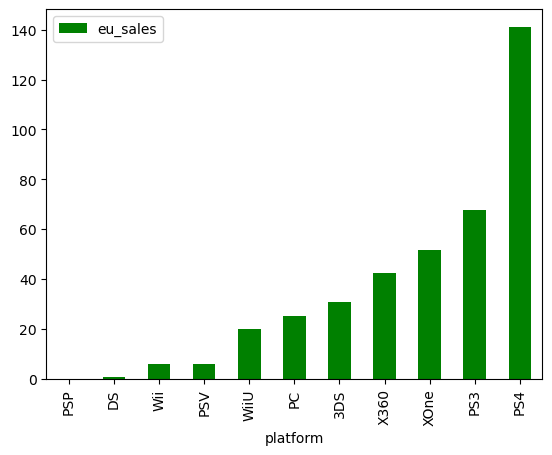

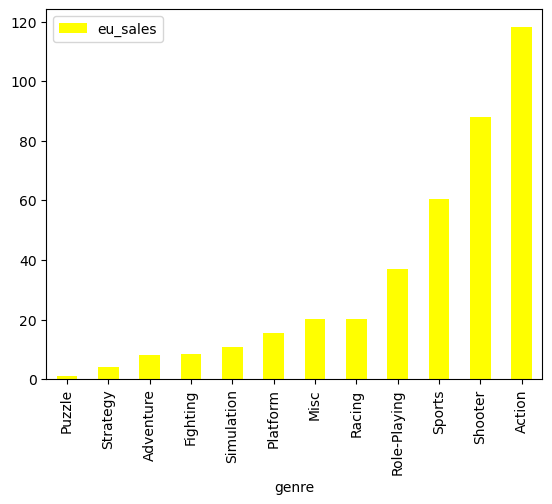

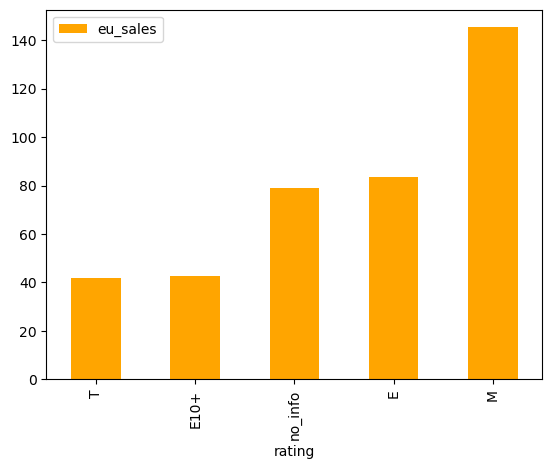

In [58]:
platform_eu = last_platform.pivot_table(index='platform', values='eu_sales', aggfunc='sum').\
sort_values('eu_sales').plot(kind='bar', color='green')

platform_eu = last_platform.pivot_table(index='genre', values='eu_sales', aggfunc='sum').\
sort_values('eu_sales').plot(kind='bar', color='yellow')

platform_eu = last_platform.pivot_table(index='rating', values='eu_sales', aggfunc='sum').\
sort_values('eu_sales').plot(kind='bar', color='orange')

Топ 5 платформ в Европе: PS4, PS3, XOne, X360, 3DS.

Топ 5 популярных жанров в Европе: action, shooter, sports, role-playing, racing.

По рейтингу ESRB в Европе лидируют игры для взрослых(M) и для всех(E).

In [59]:
platform_jp = last_platform.groupby('platform')['jp_sales'].agg(['sum'])
platform_jp

,sum
platform,
3DS,67.81
DS,0.00
PC,0.00
PS3,23.35
PS4,15.96
PSP,3.29
PSV,18.59
Wii,0.05
WiiU,10.88


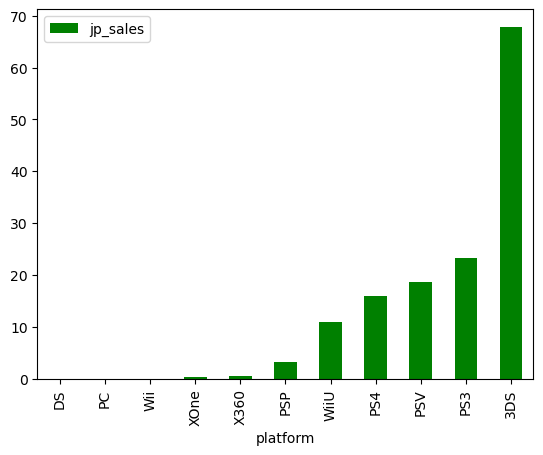

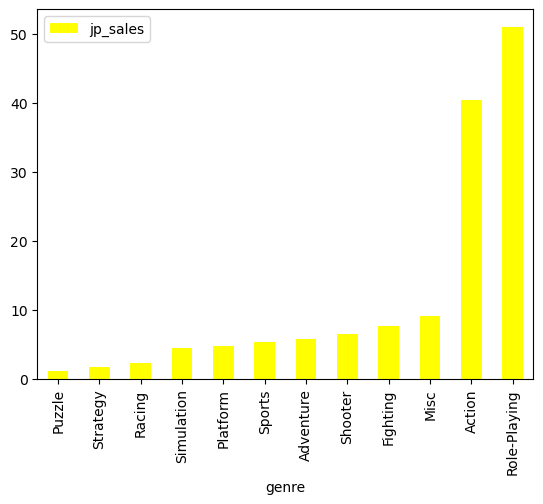

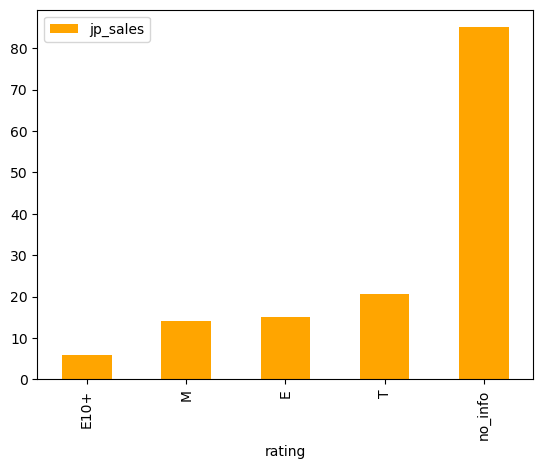

In [60]:
platform_jp = last_platform.pivot_table(index='platform', values='jp_sales', aggfunc='sum').\
sort_values('jp_sales').plot(kind='bar', color='green')

platform_jp = last_platform.pivot_table(index='genre', values='jp_sales', aggfunc='sum').\
sort_values('jp_sales').plot(kind='bar', color='yellow')

platform_jp = last_platform.pivot_table(index='rating', values='jp_sales', aggfunc='sum').\
sort_values('jp_sales').plot(kind='bar', color='orange')

Топ 5 платформ в Японии: 3DS, PS3, PSV, PS4, WiiU.

Топ 5 популярных жанров в Японии:role-playing, action, misc, fighting, shooter.

По рейтингу ESRB в Японии лидируют игры для подростков(T) и для для всех(E).

**Вывод:  В Северной Америке и Европе есть общее, что пользователи предпочитают PS4 и XOne. А в Японии больше предпочтение отдают 3DS.**

**В Северной Америке и Европе предпочитают жанры: action и shooter. А в Японии больше любят role-playing, action на втором месте.**

.**Также По рейтингу ESRB в Северной Америке и в Европе лидируют игры для взрослых(M) и для всех(E). А в Японии лидируют игры подростков(T) и для для всех(E).**

**В Северной Америке лидер по продажам  PS4 ,108 млн. продаж за 4 года.**

**В Европе лидер по продажам  PS4, 141 млн. продаж за 4 года.**

**В Японии лидер по продажам  3DS, 67 млн. продаж за 4 года.**

### Проверка гипотез.

Проверка гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H_0: средние пользовательские рейтинги (user_score) платформы "XOne" = средние пользовательские рейтинги (user_score) платформы "PC"

H_1: средние пользовательские рейтинги (user_score) платформы "XOne" ≠ средние пользовательские рейтинги (user_score) платформы
"PC"

alpha = 0.05

Для корректного подсчёта среднего в столбце user_score удалим строки с пропусками в столбце user_score, так как, если их не удалить, то p-value будет некорректным. Пропусков очень много, но удалять их уже не страшно, так как это последняя задача проекта, исследование на этом закончится.

In [61]:
last_platform['user_score'].isna().sum()

1041

In [62]:
last_platform = last_platform.dropna(subset = ['user_score'])

In [63]:
last_platform['user_score'].isna().sum()

0

In [64]:
mean_user_score_xone = last_platform[last_platform['platform'] =='XOne']['user_score']
mean_user_score_pc = last_platform[last_platform['platform'] =='PC']['user_score']

results = st.ttest_ind(mean_user_score_xone, mean_user_score_pc, equal_var=False)

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу. Значит нет оснований утверждать, что средние рейтингы пользователей XOne и PC различаются.

Проверка гипотезы: Средние пользовательские рейтинги жанров Action и Sports разные.

H_0: средние пользовательские рейтинги (user_score) жанра "Action" = средние пользовательские рейтинги (user_score) жанра "Sports"

H_1: средние пользовательские рейтинги (user_score) жанра "Action" ≠ средние пользовательские рейтинги (user_score) жанра "Sports"

alpha = 0.05

In [65]:
mean_user_score_action = last_platform[last_platform['genre'] =='Action']['user_score']
mean_user_score_sports = last_platform[last_platform['genre'] =='Sports']['user_score']

results = st.ttest_ind(mean_user_score_action, mean_user_score_sports, equal_var=False)

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

1.4460039700704315e-20
Отвергаем нулевую гипотезу


Принимаем альтернативную гипотезу. Значит есть основания утверждать, что cредние пользовательские рейтинги жанров Action и Sports разные.

## Общий вывод по проекту: 

**В ходе выполнения проекта провели предобработку данных: обработали пропуски категоризовали столбец с ESRB(это ассоциация, которая определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию), привели данные к нужному типу.**

**В ходе исследования выяснили, что с 1991 года пошёл рост выпуска игр. Больше всего игр было выпущено в 2008 и 2009 годах, но к 2016 году количество выпуска игр сократилось примерно в 2.5 раза в сравнении с пиковым значением.**

**В среднем за 10 лет с момента своего появления платформа теряет свою актуальность.**

**За последние 4 года, с 2013 по 2016 по продажам лидируют: PS4, PS3, XOne. Самые прибыльные жанры: shooter, sports, Platform. Самые неприбыльные: adventury, puzzle, strategy.**

**По диаграмме рассеяния и расчета коэффициента корреляции сделали вывод, что отзывы пользователей никак не влияют на продажи игр, отзывы критиков также большого значения не имеют.**

**По "Ящику с усами" опредидили, что выбросы есть во всех топовых платформах(PS3, XOne, PS4). Это значит, что есть игры, которые очень популярные, и их продаж было аномально много в сравнении с другими играми.**

**В Северной Америке и Европе есть общее, что пользователи предпочитают PS4 и XOne. А в Японии больше предпочтение отдают 3DS. В Северной Америке и Европе предпочитают жанры: action и shooter. А в Японии больше любят role-playing, action на втором месте. Также По рейтингу ESRB в Северной Америке и в Европе лидируют игры для взрослых(M) и для всех(E). А в Японии лидируют игры подростков(T) и для для всех(E).**

**За 4 года, с 2013 по 2016 год:**

**В Северной Америке лидер по продажам  PS4 ,108 млн. продаж. В Европе лидер по продажам  PS4, 141 млн. продаж. В Японии лидер по продажам  3DS, 67 млн. продаж.**

**Проверили 2 гипотезы и выяснили, что:**

**Нет оснований утверждать, что средние рейтингы пользователей XOne и PC различаются.**

**Есть основания утверждать, что cредние пользовательские рейтинги жанров Action и Sports разные.**